[-2.02514259] [0.18645431]
[12.02150867] [3.95402455]
[12.02150962] [3.95402268]


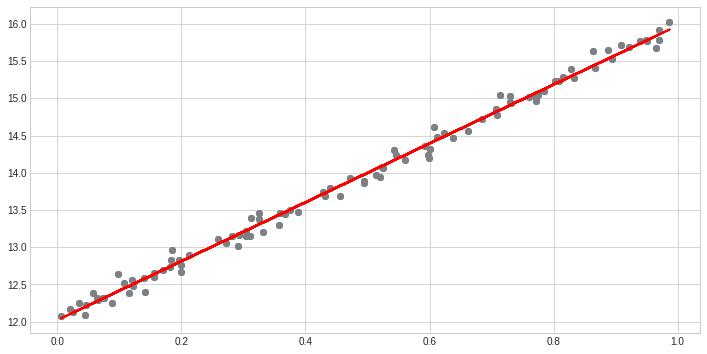

In [849]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(12,6))

np.random.seed(42) 
lr = 0.01
n_epochs = 10000
mass = 100
x = np.random.rand(mass, 1) 

y = 12 + 4 * x  + 0.1 * np.random.randn(mass, 1) #гауссовый шум 

index = np.arange(mass)
np.random.shuffle(index) #тасуем индексы 

train_index = index

# формируем наборы обучающих данных
x_train, y_train = x[train_index], y[train_index]

plt.scatter(x_train, y_train)

a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

for epoch in range(n_epochs):#F(a, b) = (y_train - yhat) ^ 2 = (12 + 4 * x_train – a + b * x_train). 
#Частная производная F по a -2 * (12 + 4 * x_train – a + b * x_train) = -2 * error. 
#Частная производная F по b будет равняться -2 * x_train * (12 + 4 * x_train – a + b * x_train) = -2 * x_train * error

    yhat = a + b * x_train
    error = (y_train - yhat)

    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    a -= lr * a_grad
    b -= lr * b_grad
print(a,b) 


from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
y_pred = linr.predict(x_train)
print(linr.intercept_, linr.coef_[0])


plt.scatter(x_train, y_train,  color='gray')
plt.plot(x_train, y_pred, color='red', linewidth=2)
plt.show()

In [1046]:
import numpy as np
import matplotlib.pyplot as plt

In [1047]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

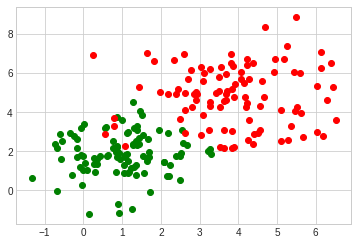

In [1048]:
plt.scatter(x_1[:,0], x_1[:,1], color = "green")
plt.scatter(x_2[:,0], x_2[:,1], color = "red")

In [1049]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [1050]:
lr = 0.1 #learning late
b = 0 #свободный член 
W[0] = 0
W[1] = 0
gradient_W1 = 0
gradient_W2 = 0
gradient_b = 0
for i in range(100):# градиент для W1 и W2
    gradient_W1 += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b))*x_1[i][0] +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))*x_2[i][0]
    gradient_W2 += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b))*x_1[i][1] +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))*x_2[i][1]
    gradient_b += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b)) +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))                                                    
for j in range(1000):
    #gradient_W = np.dot(1-sigmoid(np.dot(x_1,W.T)).T,x_1)+np.dot(0-sigmoid(np.dot(x_2,W.T)).T,x_1)+np.dot(1-sigmoid(np.dot(x_1,W.T)).T,x_2)+np.dot(0-sigmoid(np.dot(x_2,W.T)).T,x_2)
    #gradient_b = np.sum(1-sigmoid(np.dot(x_1,W.T)))+np.sum(0-sigmoid(np.dot(x_2,W.T)))
    gradient_W1 = 0
    gradient_W2 = 0
    gradient_b = 0
    for i in range(100):# градиент для W1 и W2
        gradient_W1 += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b))*x_1[i][0] +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))*x_2[i][0]
        gradient_W2 += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b))*x_1[i][1] +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))*x_2[i][1]
        gradient_b += (1 - sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b)) +  (0 - sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b))
    W[0]+= lr * gradient_W1
    W[1]+= lr * gradient_W2
    b += lr * gradient_b

print(W)
print(b)

[-8.33863815 -7.98243563]
51.740283692503034


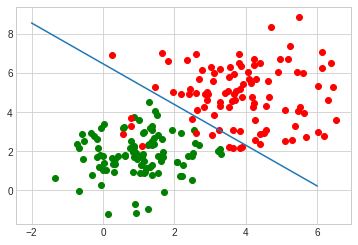

In [1051]:
plt.scatter(x_1[:,0], x_1[:,1], color = "green")
plt.scatter(x_2[:,0], x_2[:,1], color = "red")
x = np.linspace(-2, 6, 2)
y = -W[0]*x/W[1]-b/W[1]

plt.plot(x,y)

In [1052]:
acc = 0
for i in range(100):
    if sigmoid(x_1[i][0]*W[0]+x_1[i][1]*W[1] + b) > 0.5:
        acc += 1
    if sigmoid(x_2[i][0]*W[0]+x_2[i][1]*W[1] + b) <= 0.5:
        acc+= 1
print(acc/200)

0.94
